<a href="https://colab.research.google.com/github/Ian-G27/Clase_MetodosNumericos/blob/main/Regla_Compuesta_de_Simpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regla compuesta de Simpson

Escribir el python un programa que implemente el algoritmo 4.1, página 154 del Burden. Usar como prueba el ejemplo 1 de la página 150.

* Incluir gráficas y el resultado explícito.

Resultado con Simpson compuesta: 56.76958295
Valor real: 53.59815003
Error absoluto: 3.17143292e+0


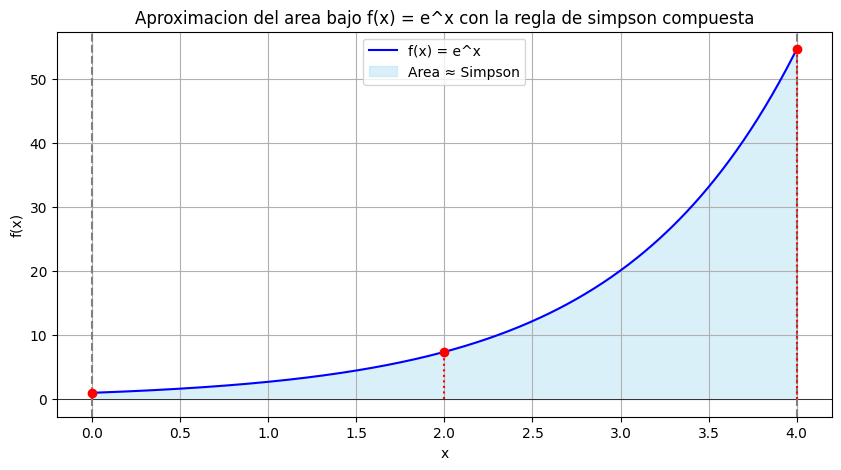

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# Definiendo primero la funcion simbolica
x = sp.Symbol('x')
f_sym = sp.exp(x)
f = sp.lambdify(x, f_sym, 'numpy')
#Parametros
a = 0
b = 4
n = 2
#Paso 1: h
h = (b - a) / n
#Paso 2: extremos
X10 = f(a) + f(b)
X11 = 0  #suma de los impares
X12 = 0  #suma de los pares
#Paso 3: suma interna, incluyendo paso 4 y paso 5
for i in range(1, n):
    X = a + i * h
    if i % 2 == 0:
        X12 += f(X)
    else:
        X11 += f(X)
#Paso 6: formula de simpson compuesta
XI = h * (X10 + 2 * X12 + 4 * X11) / 3

#Valor exacto de la integral
real = sp.integrate(f_sym, (x, a, b)).evalf()

#Resultados
print(f"Resultado con Simpson compuesta: {XI:.8f}")
print(f"Valor real: {real:.8f}")
print(f"Error absoluto: {abs(real - XI):.8e}")

#=========================
# Grafica
#=========================
x_vals = np.linspace(a, b, 400)
y_vals = f(x_vals)
plt.figure(figsize=(10,5))
plt.plot(x_vals, y_vals, label='f(x) = e^x', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.3, color='skyblue', label='Area ≈ Simpson')
plt.title('Aproximacion del area bajo f(x) = e^x con la regla de simpson compuesta')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(a, color='gray', linestyle='--')
plt.axvline(b, color='gray', linestyle='--')
# Puntos de particion
x_part = np.linspace(a, b, n+1)
y_part = f(x_part)
plt.plot(x_part, y_part, 'ro')
for xi, yi in zip(x_part, y_part):
    plt.vlines(xi, 0, yi, colors='red', linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Explicacion Del Codigo

# 1.Importacion de librerias

```
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
```

* numpy: Para calculo numerico y arreglos.

* sympy: Para algebra simbolica y calcular la integral exacta.

* matplotlib.pyplot: Para graficar la funcion y mostrar el area.



#  2. Definiendo la funcion simbolica



```
x = sp.Symbol('x')
f_sym = sp.exp(x)
f = sp.lambdify(x, f_sym, 'numpy')

```

* f_sym = sp.exp(x): definire la función $f(x)=e ˣ $  simbolicamente.

* f = sp.lambdify(...): convierte la funcion simbolica en una funcion numerica que puede evaluarse con ayuda de numpy.




# 3. Parametros de la integral

```
a = 0
b = 4
n = 4  # debe ser par

```
* a, b: son los extremos de integracion.

* n: numero de subintervalos, debe ser "par" para Simpson.






# 4. Se calculara el ancho de los subintervalos

```
h = (b - a) / n
```
* h: es el tamaño de los pasos


# 5. Inicializando las sumas para simpson

```
X10 = f(a) + f(b)  # extremos
X11 = 0  # suma de f(x_i) para i impar
X12 = 0  # suma de f(x_i) para i par

```



# 6. Ciclo para sumar valores intermedios


```
for i in range(1, n):
    X = a + i * h
    if i % 2 == 0:
        X12 += f(X)   # pares
    else:
        X11 += f(X)   # impares

```
* Se evalua la funcion en todos los puntos intermedios $xᵢ$ para $i=1,...,n−1$

* Si el indice es par, se suma a X12; si es impar, a X11.


# 7. Aplicando la formula compuesta de simpson

```
XI = h * (X10 + 2 * X12 + 4 * X11) / 3

```
* Esta es la formual de simpson compuesta


# 8. Calculare aqui el valor real

```
real = sp.integrate(f_sym, (x, a, b)).evalf()

```
* Se usa sympy para calcular la integral exacta de $eˣ$ entre 0 y 4:


# 9. Mostrando los resultados

```
print(f"Resultado con Simpson compuesta: {XI:.8f}")
print(f"Valor real: {real:.8f}")
print(f"Error absoluto: {abs(real - XI):.8e}")
```
* Asi imprimiendose:

1. Resultado aproximado.

2. Valor exacto.

3. Error absoluto.




# 10. Por ultimo imprimimos las graficas

```
x_vals = np.linspace(a, b, 400)
y_vals = f(x_vals)
plt.figure(figsize=(10,5))
plt.plot(x_vals, y_vals, label='f(x) = e^x', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.3, color='skyblue', label='Area ≈ Simpson')
plt.title('Aproximacion del area bajo f(x) = e^x con la regla de simpson compuesta')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(a, color='gray', linestyle='--')
plt.axvline(b, color='gray', linestyle='--')
```

* Se grafica la función eˣ y se sombrea el area bajo la curva.

* Se marcan los puntos xᵢ donde se evalua la funcion.

* Se visualiza la particion y como se aproxima el area con los segmentos.

